In [1]:
using JuMP, Clp, Plots

┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1260
┌ Info: Precompiling Clp [e2554f3b-3117-50c0-817c-e040a3ddf72d]
└ @ Base loading.jl:1260
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [2]:
import Pkg
Pkg.add("Clp")

   Updating registry at `C:\Users\bastin\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %.0 %

  Resolving package versions...
  Installed HDF5_jll ─ v1.10.5+6
   Updating `C:\Users\bastin\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\bastin\.julia\environments\v1.4\Manifest.toml`
  [0234f1f7] ↑ HDF5_jll v1.10.5+5 ⇒ v1.10.5+6


In [3]:
m = Model(Clp.Optimizer)
@variable(m, 0 <= x <= 4)
@variable(m, 0 <= y <= 6)
@constraint(m, 3x + 2y <= 18.0)

3 x + 2 y <= 18.0

In [4]:
x = 4
(x -> (18 - 3*x)/2)(x)

3.0

$$
y \leq \frac{18 - 3x}{2}
$$

In [5]:
@objective(m, Max, 3x+5y)

print(m)

Max 5 y + 12
Subject to
 3 x + 2 y <= 18.0
 x >= 0.0
 y >= 0.0
 x <= 4.0
 y <= 6.0


In [6]:
status = optimize!(m)

Coin0506I Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 42
Coin0511I After Postsolve, objective 42, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 42 - 0 iterations time 0.012, Presolve 0.00


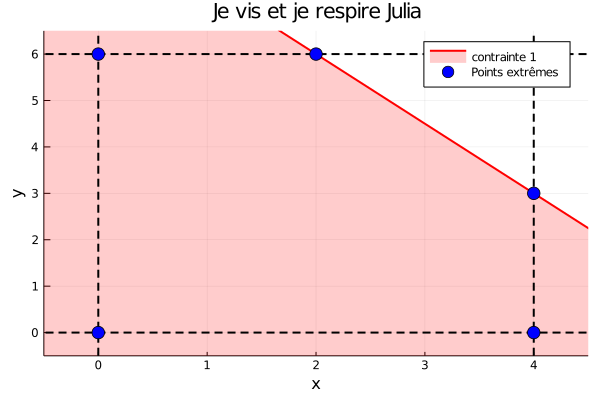

In [7]:
plot(x -> (18 - 3x)/2, fill = (-2, 0.2, :red), color = :red, 
    linewidth = 2, label = "contrainte 1")
plot!(xlims = (-0.5,  4.5), ylims = (-0.5, 6.5))
hline!([0,  6], color = :black, linestyle = :dash, linewidth = 2, label = "")
vline!([0, 4], color = :black, linestyle = :dash, linewidth = 2, label = "")
plot!(title = "Je vis et je respire Julia")
plot!(xlabel = "x")
plot!(ylabel = "y")
scatter!([0, 0, 2, 4, 4], [0, 6, 6, 0, 3], markersize = 7, color = :blue, label = "Points extrêmes")